# Homework 7
## Adam Sanchez 
### MATH 4650

______________________________________________________________________________________________________________________

### 1)

In [6]:
from scipy.special import roots_laguerre
import numpy as np

###### a)

In [242]:
import numpy as np 
import math
import matplotlib.pyplot as plt


def f(x):
    return 1/(1+x**2)

def integrate(deg): 
    sum = 0 
    x, w = np.polynomial.legendre.leggauss(deg)
    for i in range(deg): 
        sum += w[i]*f(x[i])
    return sum; 

N = 1000
I = []
err = [] 
for i in range(1,N):
    q = 2*integrate(i)
    er = abs(q-np.pi)
    I.append(q)
    err.append(er)
    

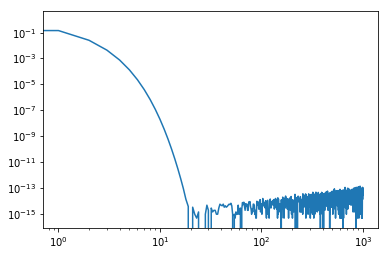

In [243]:
plt.loglog(err)

In [248]:
print('The min error is ', min(err), 'and occurs when d = ', err.index(min(err)))

The min error is  0.0 and occurs when d =  20


It looks like as the number of degrees increases we quickly become more accurate and we we hover around an error of $10^{-15}$. That being said Because $\pi$ is transendiential when we have an error of 0 im sure we are just at machine precision.  

###### b)

Note, with $x = e^t - 1$, our function is now $e^{-t}$

In [283]:
f = lambda x: math.exp(-x)
def integrate(deg): 
    sum = 0
    x, w = np.polynomial.legendre.leggauss(deg)
    for i in range(deg): 
        sum += w[i]*f(x[i])
    return sum; 

N = 1000
I = []
err = [] 
for i in range(1,N):
    q = 2*integrate(i)
    er = abs(q-np.pi)
    I.append(q)
    err.append(er)

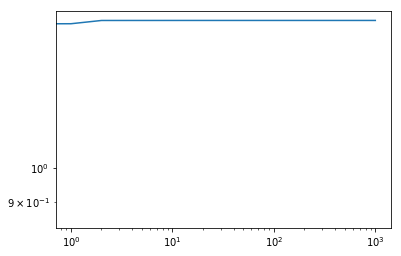

In [284]:
plt.loglog(err)

Well this looks very odd. It appears that our error is fixed at a rather large value no matter what d is. I will talk more about what I think is happeneing in part c. 

###### c)

So for part b I think we are some weird things happening with the weights from Leggauss polynomial and our function that is now just $e^{-x}$ I think this has to do with the fact that the weights are orthogonal to the weight function, which just so happens to be $e^{-x}$ so I think we are getting some weird cancelation. So for this problem I dont thing the change of variables would be the best and I would just use part a instead. 

______________________________________________________________________________________________________________________

### 2

###### a)

In [202]:
from scipy.integrate import quadrature, quad, dblquad 
import time 

In [183]:

def baseQuadratureRule(f,a,b):
    Q, errEstimate = quad(f,a,b,epsabs=1.5e-8,epsrel=1.5e-8,limit=50)
    return Q

def my2D_quadrature(f,a,b,c,d, baseQuadRule ):
    @np.vectorize 
    def g(x):
    
        def f_as_fcn_of_y(y):
            return f(x,y)

    
        Q = baseQuadRule( f_as_fcn_of_y, c, d )
        return Q
  
    Q = baseQuadRule( g, a, b )
    return Q

def my3D_quadrature(f,a1,b1,a2,b2,a3,b3, my2D_quadrature ):
    @np.vectorize 
    def g(x):
    
        def f_as_fcn_of_yz(y,z):
            return f(x,y,z)

    
        Q = my2D_quadrature( f_as_fcn_of_yz, a2, b2, a3, b3, baseQuadratureRule )
        return Q
  
    Q = baseQuadratureRule( g, a1, b1 )
    return Q
def my4D_quadrature(f,a1,b1,a2,b2,a3,b3,a4,b4, my3D_quadrature ):
    @np.vectorize 
    def g(x):
    
        def f_as_fcn_of_yzw(y,z,w):
            return f(x,y,z,w)

    
        Q = my3D_quadrature( f_as_fcn_of_yzw, a2, b2, a3, b3, a4, b4,  my2D_quadrature )
        return Q
  
    Q = baseQuadratureRule( g, a1, b1 )
    return Q

###### b)

In [147]:
from scipy.linalg import hilbert
d=2
A = hilbert(d)
def f(x,y): 
    args = np.array([x,y])
    return args.T.dot(args.dot(A))
def p(x,y): 
    return((1/(2*np.pi)**(2/2))*np.exp(-(x**2+y**2)/2))
def g(x,y): 
    return(f(x,y)*p(x,y))
#my2D_quadrature(g,-5,5,-5,5, baseQuadratureRule(g, -5,5))


In [148]:
my2D_quadrature(g,-5,5,-5,5, baseQuadratureRule)

1.3333119816098895

In [174]:
d=3
A = hilbert(d)
def f(x,y,z): 
    args = np.array([x,y,z])
    return args.T.dot(args.dot(A))
def p(x,y,z): 
    return((1/(2*np.pi)**(3/2))*np.exp(-(x**2+y**2+z**2)/2))
def g(x,y,z): 
    return(f(x,y,z)*p(x,y,z))

In [179]:
my3D_quadrature(g,-5,5,-5,5,-5,5, my2D_quadrature )

1.533307899800628

In [184]:
d=4
A = hilbert(d)
def f(x,y,z,w): 
    args = np.array([x,y,z,w])
    return args.T.dot(args.dot(A))
def p(x,y,z,w): 
    return((1/(2*np.pi)**(4/2))*np.exp(-(x**2+y**2+z**2+w**2)/2))
def g4(x,y,z,w): 
    return(f(x,y,z,w)*p(x,y,z,w))

In [185]:
my4D_quadrature(g4,-5,5,-5,5,-5,5,-5,5,my3D_quadrature)

1.6761617121244665

###### i) 

As we can see from the line of code above, $ E\left[f(x)\right]\approx 1.6761676$, when $d = 4$. 

###### ii) 

My error tollerence (both absolute annd relative) for 1D is very low so it doesnt surprise that 4D took a very long time to run (it was approx. 5 min). For both 2D and 3D the functions were evulated much quicker as would be expected in a problem like this. 

###### c)

In [219]:
def MonteCarlo(d, N, Verbose = True):
    start_time = time.time()
    A = hilbert(d)
    I = 0.0
    for i in range(N):
        x = np.random.randn(d)
        f = x.T.dot(x.dot(A))
        I += f
    I = (1/N)*I
    end_time = time.time()
    if Verbose == True:
        print('Excution time is:',end_time-start_time, ' seconds')
    return I

Running our MonteCarlo for d = 2,3,4:

In [218]:
I2 = MonteCarlo(2,10**6, Verbose = False)
I3 = MonteCarlo(3,10**6, Verbose = False)
I4 = MonteCarlo(4,10**6, Verbose = False)

print("For d=2: ", I2)
print("For d=3: ", I3)
print("For d=4: ", I4)

For d=2:  1.3342270837817078
For d=3:  1.53219163268725
For d=4:  1.678155905224539


Now finding the runtime and error for d = 4,12,100

In [221]:
#runtime and error for d=4
I4 = MonteCarlo(4,10**6, Verbose = True)
print('Error for d=4 is:', abs(I4 - 1.6761617121244665))

Excution time is: 2.024691104888916  seconds
Error for d=4 is: 0.00175656939114055


In [222]:
#runtime and error for d=12
I12 = MonteCarlo(12,10**6, Verbose = True)
print('Error for d=12 is:', abs(I12 - 2.224352838648))

Excution time is: 2.243312120437622  seconds
Error for d=12 is: 0.0021304304003479935


In [224]:
#runtime and error for d=100
I100 = MonteCarlo(100,10**6, Verbose = True)
print('Error for d=100 is:', abs(I100 - 3.284342189302))

Excution time is: 5.517652988433838  seconds
Error for d=100 is: 0.002000626990464216


###### d)

It seems like quadature is probably more accurate than Monte Carlo is expically in low levels of d. However quadature would probably be almost impossible to run on my compute for d =100 ao I think when we have igh dimensions Monte Carlo is the way to go!